In [27]:
import os, sys, json
from collections import Counter

import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sys.path.insert(0, '/mnt/d/projects/bassline_transcription')
sys.path.insert(0, '/scratch/users/udemir15/ELEC491/bassline_transcription')

from bassline_extractor.chorus_estimation import drop_detection, check_chorus_beat_grid

from utilities import *
import plotting as plot

In [3]:
directories = get_directories('../data/directories.json')

analysis_dir = directories['extraction']['chorus']['chorus_beat_analysis']

analysis_files = [name for name in glob.glob(analysis_dir+'/*.npy')]
print(len(analysis_files))

1568


In [4]:
# read merged_track dicts

track_dicts_name = 'TechHouse_total_track_dicts.json'
_, track_dicts, track_titles = read_metadata(directories, track_dicts_name)

## Beat Grid Analysis

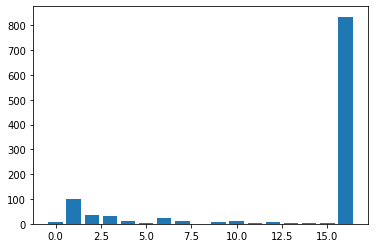

In [16]:
deviation_counter = Counter()

bad_beat_titles = []
for file in analysis_files:
    
    try:
        title = file.split('/')[-1].split('.npy')[0]

        beat_length = 60/int(track_dicts[title]['BPM'])

        val = np.load(file)
        
        deviation_indices = check_chorus_beat_grid(val, beat_length)        
        deviation_counter[len(deviation_indices)] += 1
        
        if len(deviation_indices) > 8:
            bad_beat_titles.append(title)
                
    except:
        pass
    
deviation_counter = dict(sorted(deviation_counter.items(), key=lambda x: x[0]))

fig, ax = plt.subplots()
ax.bar(deviation_counter.keys(),deviation_counter.values())
plt.show()

## Pitch Track Analysis

In [147]:
analysis_dir = directories['transcription']['bassline_transcription']['pitch_track']

analysis_files = [name for name in glob.glob(analysis_dir+'/*.npy')]
print(len(analysis_files))

9855


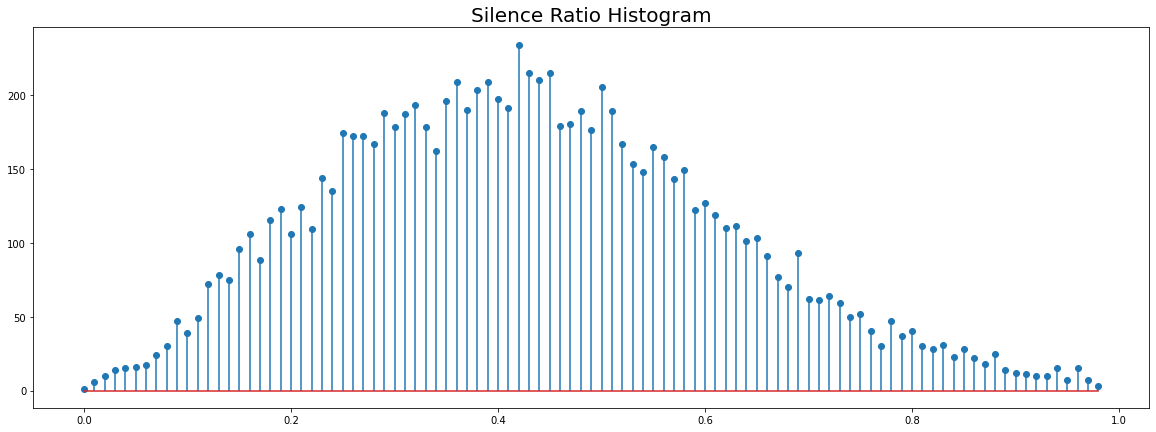

In [204]:
zero_counter = Counter()
empty_pitch_titles = {}
full_pitch_titles = {}
for file in analysis_files:
    
    try:
        title = file.split('/')[-1].split('.npy')[0]

        val = np.load(file)
        pitch_track = val[1]
        
        zero_percentage = 1-np.round(np.count_nonzero(pitch_track)/len(pitch_track), decimals=2)
        zero_counter[zero_percentage] += 1
        
        if zero_percentage <= 0.5:
            full_pitch_titles[title] = zero_percentage
        
        if zero_percentage > 0.5:
            empty_pitch_titles[title] = zero_percentage
        
    except SystemInterrupt:
        break
    except:
        pass

zero_counter = dict(sorted(zero_counter.items(), key=lambda x: x[1]))
full_pitch_titles = dict(sorted(full_pitch_titles.items(), key=lambda x: x[1]))
empty_pitch_titles= dict(sorted(empty_pitch_titles.items(), key=lambda x: x[1]))    

vals, labels = zip(*zero_counter.items())

fig, ax = plt.subplots(figsize=(20,7))
ax.set_title('Silence Ratio Histogram', fontsize=20)
ax.stem(vals, labels)
plt.show()

In [150]:
counter = 0
for val in bad_pitch_titles.values():
    if val >0.53:
        counter += 1
print(counter)

2738


In [205]:
bad_empty_pitch_titles = {tit: val for tit, val in empty_pitch_titles.items() if val >0.53}
bad_full_pitch_titles = {tit: val for tit, val in full_pitch_titles.items() if val <0.20}

bad_pitch_titles.items()

In [ ]:
worse_pitch_titles.items()

#title = "Moving Blind (Biscits Remix)"
#title = "Detlef - JayDee (Original Mix)"
#title = "Brett Johnson - Breathe"
#title = "Trust The Drum (That Kid Chris Remix)"
title ="Rich Pinder - Danza (Original Mix)"
title = "Kriece - Something Wicked (Style of Eye Remix)"
title ="Kerri Chandler - Heal My Heart (Marco Anzalone Vocal Remix)"
title = "Piem - Small Man (Original Mix)"
title = "Narciso & Gerundino - All On You (Original Mix)"
title = "CK - Monoclap"
title = "Alphaat - Attila"
title = "Jay de Lys - Basketball (Original Mix"
title = "Sleepy & Boo - Won't Cha (Original Mix)"
#title="Kolombo - Wait & See (Original Mix)"
title="George Vala, Arkosé - Puttanesca (Rafa Barrios Remix)" # eh
title = "Mark Reeve - Daybreak On Mars"
title = "Marco Faraone, Greeko - Armaghetton (Extended Mix)" # eh
title = "Rihanna - We Found Love (Ibrahim Çelik Remix)"
title = "Fernando Tessis, David Kinnard - Again (Vloon M Remix)" # 
title = "Darius Syrossian - Danzer (Original Mix)" # terrible
title = "Amine Edge & DANCE - Pop Smoke (Original Mix)"
title = "Nils Ohrmann - Vamos Nessa (Original Mix)"
title = "Eddie Cuesta - Ethnica (Original Mix)"

print(bad_pitch_titles[title])
M=1

In [151]:
good_pitch_titles.items()

dict_items([('Velvit - Looking Glass (Original Mix)', 0.0), ('Will Eastman - Tell Me (feat. Patrick Baker)', 0.010000000000000009), ('Teho - Into the Wild', 0.010000000000000009), ("Loco Dice - We're Alive (Virgil Abloh Remix)", 0.010000000000000009), ('Lady Bee, Tima Dee - Roll It (Tough Love Extended Remix)', 0.010000000000000009), ('Ali Love - Perfect Picture (Skream Remix)', 0.010000000000000009), ('Evan Duthie - Echo (Extended Mix)', 0.010000000000000009), ('Robert James - Seagate (Original Mix)', 0.020000000000000018), ('Juan Diaz - Illusion (Original Mix)', 0.020000000000000018), ('Mattew Jay - Boreal Dust', 0.020000000000000018), ('Digitaria - Again and Again', 0.020000000000000018), ('August Five - No Good (Original Mix)', 0.020000000000000018), ('Gorgon City, DRAMA - Nobody', 0.020000000000000018), ('Brett Johnson - The Awakening (Original Mix)', 0.020000000000000018), ("Marco C. - I'ts Over (Original Mix)", 0.020000000000000018), ('Adriatique - Space Knights', 0.020000000000

In [200]:
title = "Velvit - Looking Glass (Original Mix)"
title = "Marco C. - I'ts Over (Original Mix)"
title = "DJ Fronter - Grounded (Original Mix)"
title = "Jon Kennedy - Time Warp (Original Mix)"
title = "Sidney Charles - Mono Pulse"
title = "Turn Turn Turn (Chopstick & Johnjon Remix)"
title = "Franky Rizardo - Call Upon Me"
title = "Lau Frank - Drift" # good
title = "Pysh - By Night (Original Mix)"
title = "Ahmet Sendil - Acapulco (D-Unity Remix)"
title = "Dipzy - Wobble Like (Original Mix)"
title = "Justin Jay - Don't Trip (Original Mix)"

print(good_pitch_titles[title])

0.20999999999999996


In [201]:
print(title)
M= 8

F0_estimate = load_F0_estimate(title, directories)

pitch_track = load_pitch_track(title, directories)

quantized_pitch_track = load_quantized_pitch_track(title, directories)

print(len(quantized_pitch_track[1]))

bassline_midi = load_bassline_midi_array(title, directories, M)

symbolic_representation = load_symbolic_representation(title, directories, M)

midi_number = transcription.unpack_repetitions(symbolic_representation)

Justin Jay - Don't Trip (Original Mix)
513


		Justin Jay - Don't Trip (Original Mix)

Chorus

Fs = 44100, x.shape = (333397,), x.dtype = float32


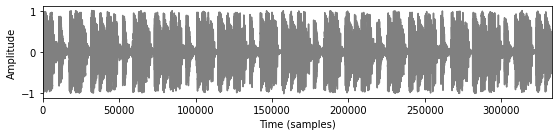

Bassline

Fs = 44100, x.shape = (333397,), x.dtype = float64


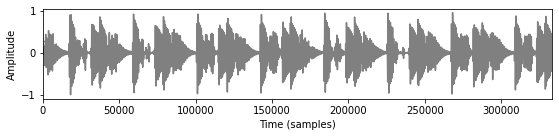

In [202]:
inspect_audio_outputs(title, directories, fs=44100)

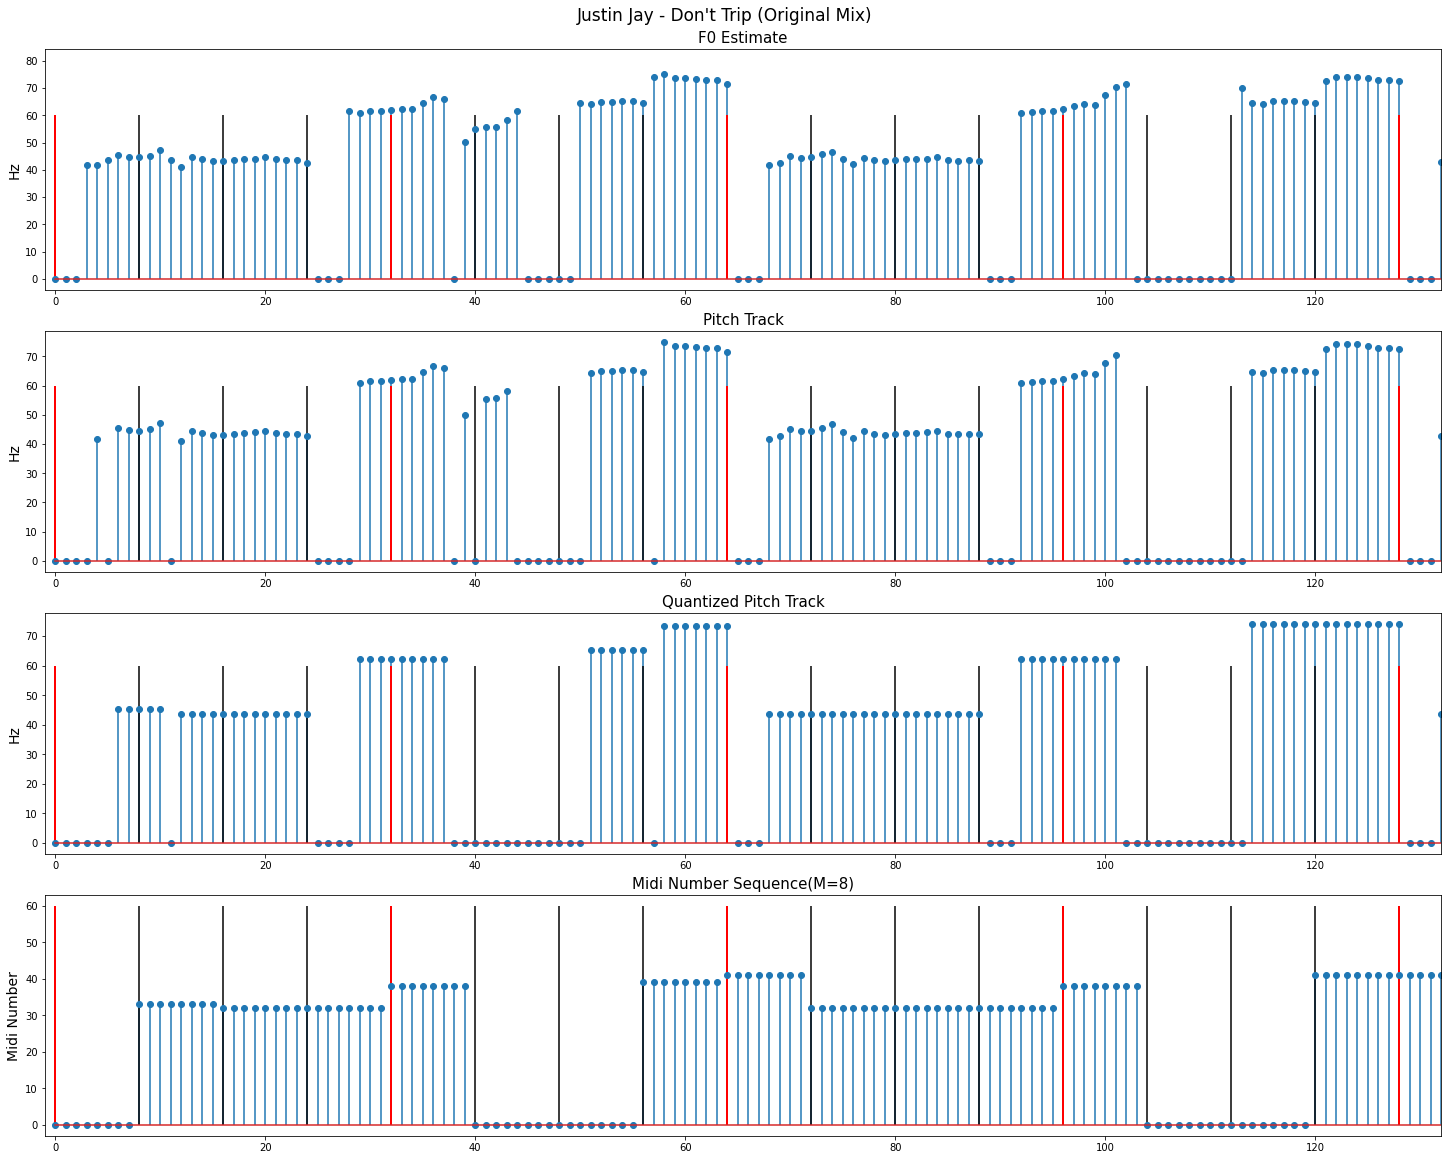

In [203]:
plot.F0_related_stem(title, F0_estimate, pitch_track, quantized_pitch_track, symbolic_representation, M)

## Merging the Analysis

In [143]:
len(worse_pitch_titles)

2738

In [ ]:
bad_empty_pitch_titles
bad_full_pitch_titles

In [206]:
bad_titles = bad_beat_titles + list(bad_empty_pitch_titles.keys()) + list(bad_full_pitch_titles.keys())
bad_titles = set(bad_titles)

In [207]:
with open('../data/metadata/bad_beat_f0_titles.txt', 'w') as outifle:
    outifle.write('\n'.join(bad_titles))